In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly 
import plotly.express as ex
import seaborn as sns
from plotly.io import templates
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/student-performance-data/student_data.csv


In [2]:
df= pd.read_csv('../input/student-performance-data/student_data.csv')
df.shape

(395, 33)

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
total_grade = (df.G1 + df.G2 + df.G3)
average_grade = total_grade/3
df['G_Mean'] = average_grade
df.head(4)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_Mean
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.666667


In [5]:
print(df['G1'].max())
print(df['G2'].max())
print(df['G3'].max())

19
19
20


In [6]:
percentage = (total_grade / 60)*100
df['G_Percentage'] = percentage
df['Total_grade'] = total_grade
df.head(4)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,G_Mean,G_Percentage,Total_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,5.666667,28.333333,17
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,5.333333,26.666667,16
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,8.333333,41.666667,25
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,14.666667,73.333333,44


In [7]:
df['G_Percentage'].max()

96.66666666666667

In [8]:
df['G_Percentage'].min()

6.666666666666667

In [9]:
print('Number of Student less than 35 percent ',len(df.query('G_Percentage < 35')))
print('Number of Student more than 35 percent ',len(df.query('G_Percentage > 35')))
print('Number of Student more than 90 percent ',len(df.query('G_Percentage > 90')))

Number of Student less than 35 percent  60
Number of Student more than 35 percent  327
Number of Student more than 90 percent  6


In [10]:
students_above_90 = df.query('G_Percentage > 90')

In [11]:
students_above_90.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,G_Mean,G_Percentage,Total_grade
42,GP,M,15,U,GT3,T,4,4,services,teacher,...,1,1,5,2,19,18,18,18.333333,91.666667,55
47,GP,M,16,U,GT3,T,4,3,health,services,...,1,1,2,4,19,19,20,19.333333,96.666667,58
110,GP,M,15,U,LE3,A,4,4,teacher,teacher,...,1,1,4,6,18,19,19,18.666667,93.333333,56
113,GP,M,15,U,LE3,T,4,2,teacher,other,...,1,1,3,10,18,19,19,18.666667,93.333333,56
286,GP,F,18,U,GT3,T,2,2,at_home,at_home,...,1,2,2,5,18,18,19,18.333333,91.666667,55


<BarContainer object of 395 artists>

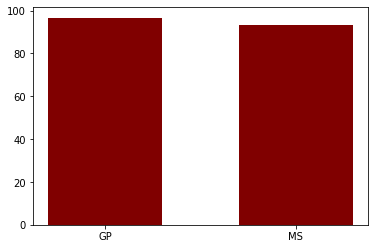

In [12]:
plt.bar(df['school'], df['G_Percentage'], color ='maroon',
        width = 0.6)

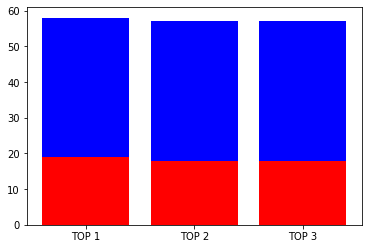

In [13]:
x = ['TOP 1', 'TOP 2', 'TOP 3']
Top_3 = students_above_90.sort_values(['Total_grade'], ascending=[False]).head(3)
y1 = Top_3['G1']
y2 = Top_3['G2']
y3 = Top_3['G3']

plt.bar(x, y1, color='r')
plt.bar(x, y2+y1, bottom= y1, color='b')
plt.bar(x, y3+y2, bottom= y2, color='b')
plt.show()

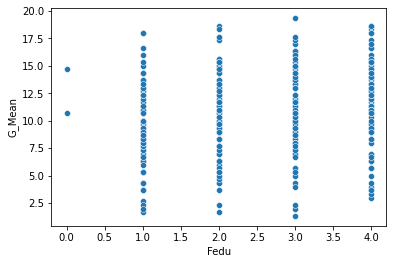

In [14]:
# sns.scatterplot(x = 'Medu', y = 'G_Mean', data = df)
plt.show()
sns.scatterplot(x = 'Fedu', y = 'G_Mean', data = df)
plt.show()

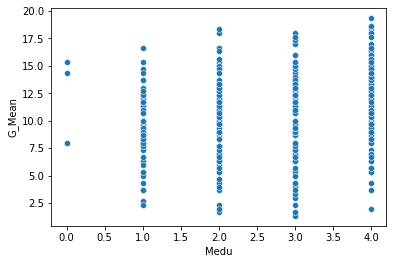

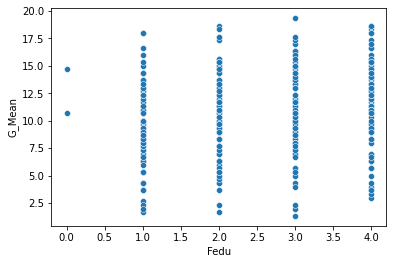

In [15]:
sns.scatterplot(x = 'Medu', y = 'G_Mean', data = df)
plt.show()
sns.scatterplot(x = 'Fedu', y = 'G_Mean', data = df)
plt.show()

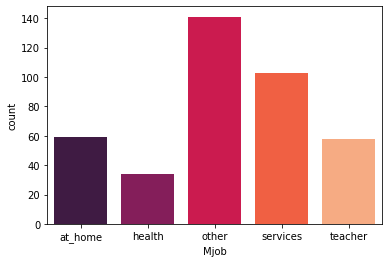

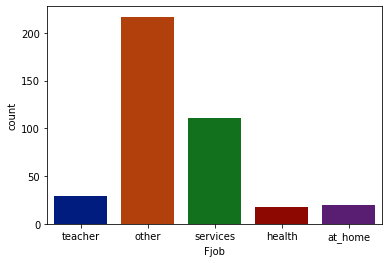

In [16]:
sns.countplot(x='Mjob', data = df, palette='rocket', saturation=1.9)
plt.show()
sns.countplot(x='Fjob', data = df, palette='dark', saturation=1.9)
plt.show()

In [17]:
new_df = df.copy()

In [18]:
lencoder = LabelEncoder() 
new_df['school'] = lencoder.fit_transform(new_df['school'])
new_df['higher'] = lencoder.fit_transform(new_df['higher'])
new_df['Pstatus'] = lencoder.fit_transform(new_df['Pstatus'])

In [19]:
new_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,G_Mean,G_Percentage,Total_grade
0,0,F,18,U,GT3,0,4,4,at_home,teacher,...,1,1,3,6,5,6,6,5.666667,28.333333,17
1,0,F,17,U,GT3,1,1,1,at_home,other,...,1,1,3,4,5,5,6,5.333333,26.666667,16
2,0,F,15,U,LE3,1,1,1,at_home,other,...,2,3,3,10,7,8,10,8.333333,41.666667,25
3,0,F,15,U,GT3,1,4,2,health,services,...,1,1,5,2,15,14,15,14.666667,73.333333,44
4,0,F,16,U,GT3,1,3,3,other,other,...,1,2,5,4,6,10,10,8.666667,43.333333,26


In [20]:
new_df['sex'].unique().tolist()

['F', 'M']

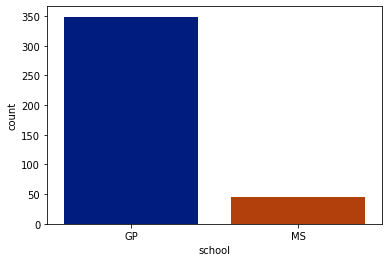

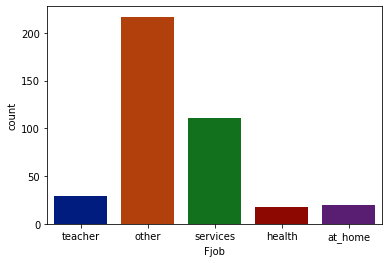

In [21]:
sns.countplot(x='school', data = df, palette='dark', saturation=1.9)
plt.show()
sns.countplot(x='Fjob', data = df, palette='dark', saturation=1.9)
plt.show()

In [22]:
new_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,G_Mean,G_Percentage,Total_grade
0,0,F,18,U,GT3,0,4,4,at_home,teacher,...,1,1,3,6,5,6,6,5.666667,28.333333,17
1,0,F,17,U,GT3,1,1,1,at_home,other,...,1,1,3,4,5,5,6,5.333333,26.666667,16
2,0,F,15,U,LE3,1,1,1,at_home,other,...,2,3,3,10,7,8,10,8.333333,41.666667,25
3,0,F,15,U,GT3,1,4,2,health,services,...,1,1,5,2,15,14,15,14.666667,73.333333,44
4,0,F,16,U,GT3,1,3,3,other,other,...,1,2,5,4,6,10,10,8.666667,43.333333,26


In [23]:
print("Skew of failures:", df['failures'].skew())
print("Skew of goout:", df['goout'].skew())
print("Skew of studytime:", df['studytime'].skew())
print("Skew of Medu:", df['Medu'].skew())
print("Skew of Fedu:", df['Fedu'].skew())

Skew of failures: 2.38702572387036
Skew of goout: 0.11650241685363202
Skew of studytime: 0.6321422002561792
Skew of Medu: -0.31838068845785517
Skew of Fedu: -0.03167209443510635


In [24]:
new_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,G_Mean,G_Percentage,Total_grade
0,0,F,18,U,GT3,0,4,4,at_home,teacher,...,1,1,3,6,5,6,6,5.666667,28.333333,17
1,0,F,17,U,GT3,1,1,1,at_home,other,...,1,1,3,4,5,5,6,5.333333,26.666667,16
2,0,F,15,U,LE3,1,1,1,at_home,other,...,2,3,3,10,7,8,10,8.333333,41.666667,25
3,0,F,15,U,GT3,1,4,2,health,services,...,1,1,5,2,15,14,15,14.666667,73.333333,44
4,0,F,16,U,GT3,1,3,3,other,other,...,1,2,5,4,6,10,10,8.666667,43.333333,26


Text(0.5, 1.0, 'Fedu v. G_AVG')

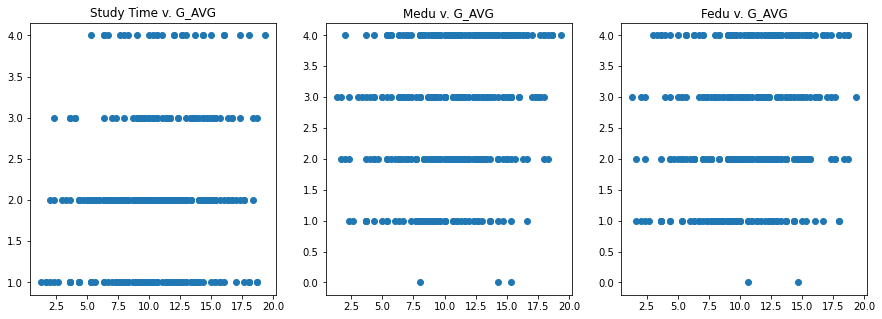

In [25]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.scatter(df.G_Mean, df.studytime)
plt.title('Study Time v. G_AVG')

plt.subplot(1,3,2)
plt.scatter(df.G_Mean, df.Medu)
plt.title('Medu v. G_AVG')

plt.subplot(1,3,3)
plt.scatter(df.G_Mean, df.Fedu)
plt.title('Fedu v. G_AVG')

In [26]:
df_study2hoursorless = df.query('studytime <= 2')
df_study3hoursormore = df.query('studytime > 2')

print('2 Hours or Less', df_study2hoursorless.G_Mean.describe())
print('3 Hours or More', df_study3hoursormore.G_Mean.describe())

2 Hours or Less count    303.000000
mean      10.377338
std        3.653937
min        1.333333
25%        8.000000
50%       10.333333
75%       12.666667
max       18.666667
Name: G_Mean, dtype: float64
3 Hours or More count    92.000000
mean     11.673913
std       3.682111
min       2.333333
25%       9.333333
50%      11.666667
75%      14.333333
max      19.333333
Name: G_Mean, dtype: float64
